In [2]:
%reload_ext autoreload
%autoreload 2
from pathlib import Path

import rasterio as rst
from lightning.pytorch import Trainer

from eotorch.data import (
    SegmentationDataModule,
    SemanticSegmentationTask,
    get_segmentation_dataset,
)
from eotorch.plot import plot_samples

class_mapping = {
    1: "Baresoil",
    2: "Buildings",
    3: "Coniferous Trees",
    4: "Deciduous Trees",
    5: "Grass",
    6: "Impervious",
    7: "Water",
}

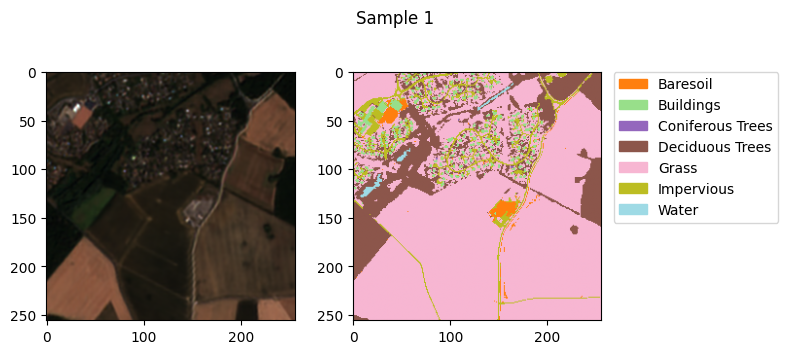

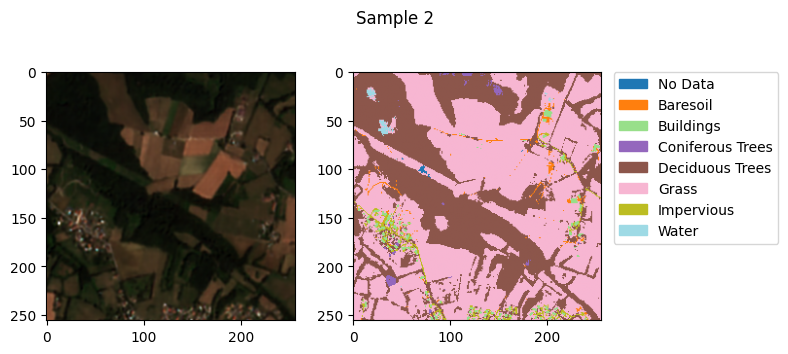

In [4]:
ds = get_segmentation_dataset(
    images_dir="dev_data/sr_data",
    labels_dir="dev_data/labels",
    all_image_bands=("B02", "B03", "B04", "B08", "B11", "B12"),
    rgb_bands=("B04", "B03", "B02"),
    class_mapping=class_mapping,
    reduce_zero_label=True,
)
plot_samples(ds, n=2, patch_size=256)


In [5]:
module = SegmentationDataModule(
    dataset=ds,
    batch_size=8,
    patch_size=256,
    num_workers=4,
)

In [ ]:
task = SemanticSegmentationTask(
    model="deepresunet",
    in_channels=6,
    num_classes=len(class_mapping),
    loss="ce",
    ignore_index=-1,  # because reduce_zero_label=True
)
trainer = Trainer()
# trainer = Trainer(num_sanity_val_steps=-1)

trainer.fit(model=task, datamodule=module)